In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

from config import *

#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(14, 7))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

In [3]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal
dfwCbsas = {10220, 11620, 11980, 14300, 15220, 18620, 20340, 20460, 23620, 24180, 27380, 32540, 33420, 34420, 34860, 37300, 37580, 44500, 44860, 46900}
isDfw = df19['CBSA'].isin(dfwCbsas)

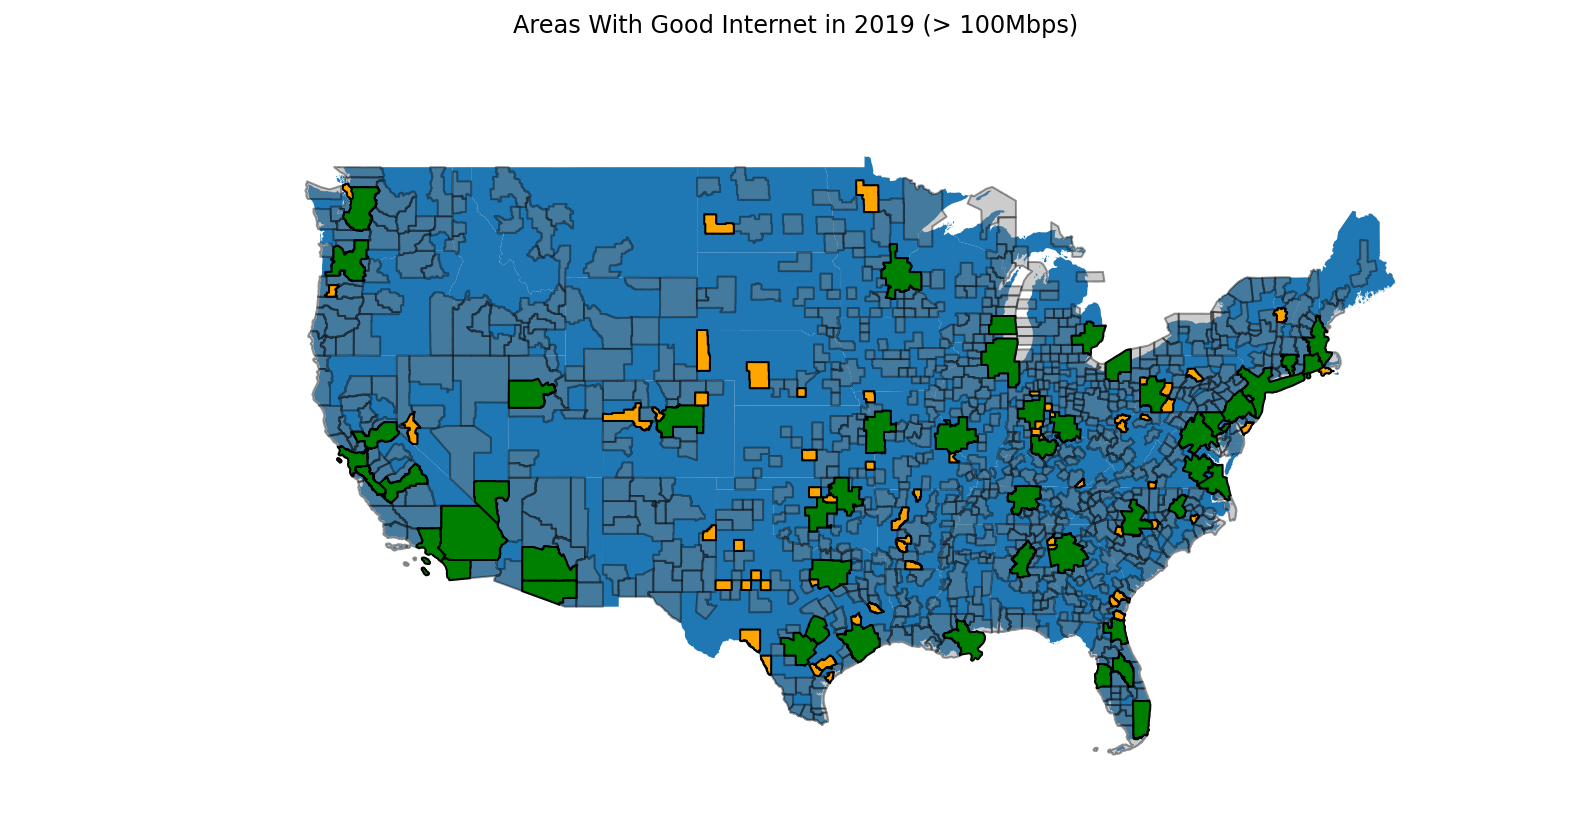

In [4]:
good = df19['avg_d_kbps'] > 100_000
ax = plotUS()
df21.plot(ax=ax, color="grey", edgecolor="black", linewidth=1, alpha=0.4)
df21[metro & good].plot(ax=ax, color="green", edgecolor="black", linewidth=1)
df21[micro & good].plot(ax=ax, color="orange", edgecolor="black", linewidth=1)
plt.axis('off')
plt.title("Areas With Good Internet in 2019 (> 100Mbps)");

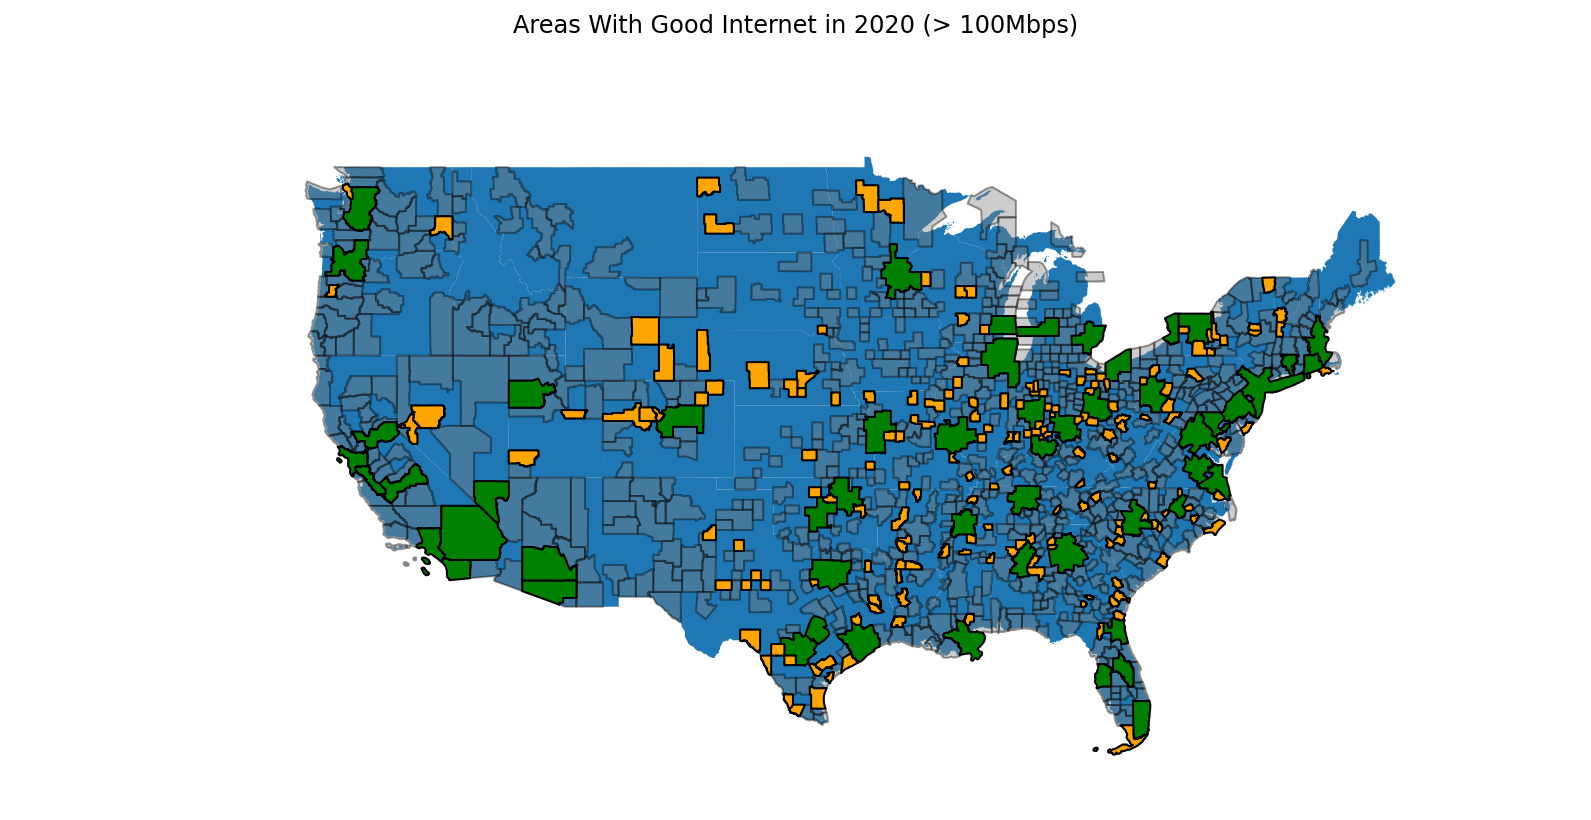

In [5]:
good = df20['avg_d_kbps'] > 100_000
ax = plotUS()
df21.plot(ax=ax, color="grey", edgecolor="black", linewidth=1, alpha=0.4)
df21[metro & good].plot(ax=ax, color="green", edgecolor="black", linewidth=1)
df21[micro & good].plot(ax=ax, color="orange", edgecolor="black", linewidth=1)
plt.axis('off')
plt.title("Areas With Good Internet in 2020 (> 100Mbps)");

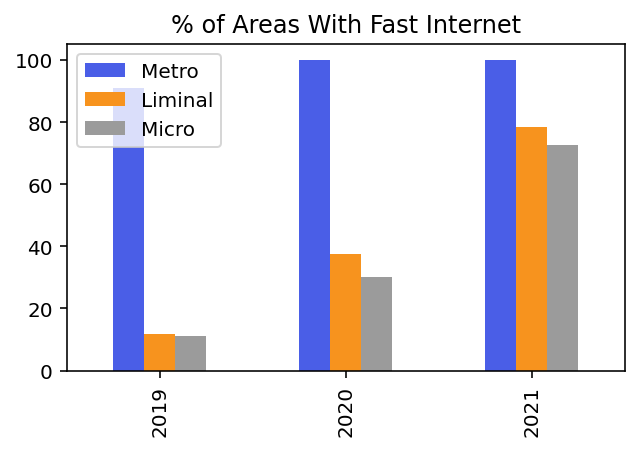

In [6]:
df = pd.DataFrame()
df.loc[2019, 'Metro']   = (df19[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2019, 'Liminal'] = (df19[liminal]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2019, 'Micro']   = (df19[notLim]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'Metro']   = (df20[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'Liminal'] = (df20[liminal]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'Micro']   = (df20[notLim]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'Metro']   = (df21[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'Liminal'] = (df21[liminal]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'Micro']   = (df21[notLim]['avg_d_kbps'] > 100_000).mean() * 100
df.plot(kind='bar', color=['#4a5ee7', '#f7931e', '#9b9b9b'], figsize=(5, 3))
plt.title("% of Areas With Fast Internet");
plt.savefig("figures/Internet Access.png", dpi=300, bbox_inches='tight')

In [7]:
df

,Metro,Liminal,Micro
2019,91.071429,11.805556,11.290323
2020,100.000000,37.500000,30.241935
2021,100.000000,78.472222,72.580645


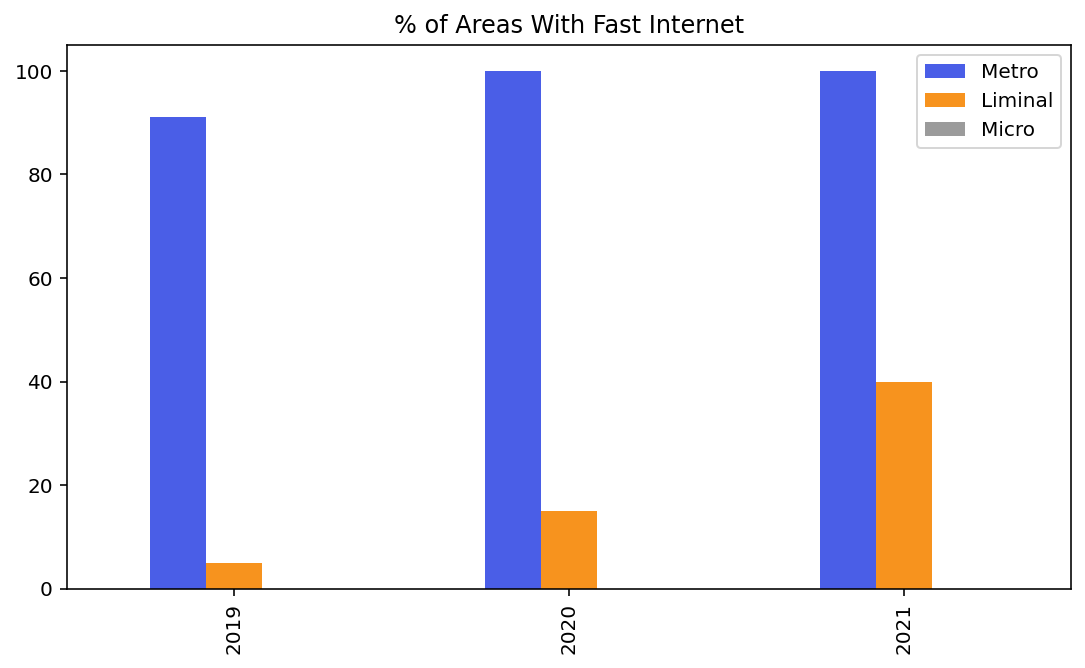

In [8]:
df = pd.DataFrame()
df.loc[2019, 'Metro']   = (df19[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2019, 'Liminal'] = (df19[liminal & isDfw]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2019, 'Micro']   = (df19[notLim & isDfw]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'Metro']   = (df20[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'Liminal'] = (df20[liminal & isDfw]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'Micro']   = (df20[notLim & isDfw]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'Metro']   = (df21[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'Liminal'] = (df21[liminal & isDfw]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'Micro']   = (df21[notLim & isDfw]['avg_d_kbps'] > 100_000).mean() * 100
df.plot(kind='bar', color=['#4a5ee7', '#f7931e', '#9b9b9b'], figsize=(9, 5))
plt.title("% of Areas With Fast Internet");

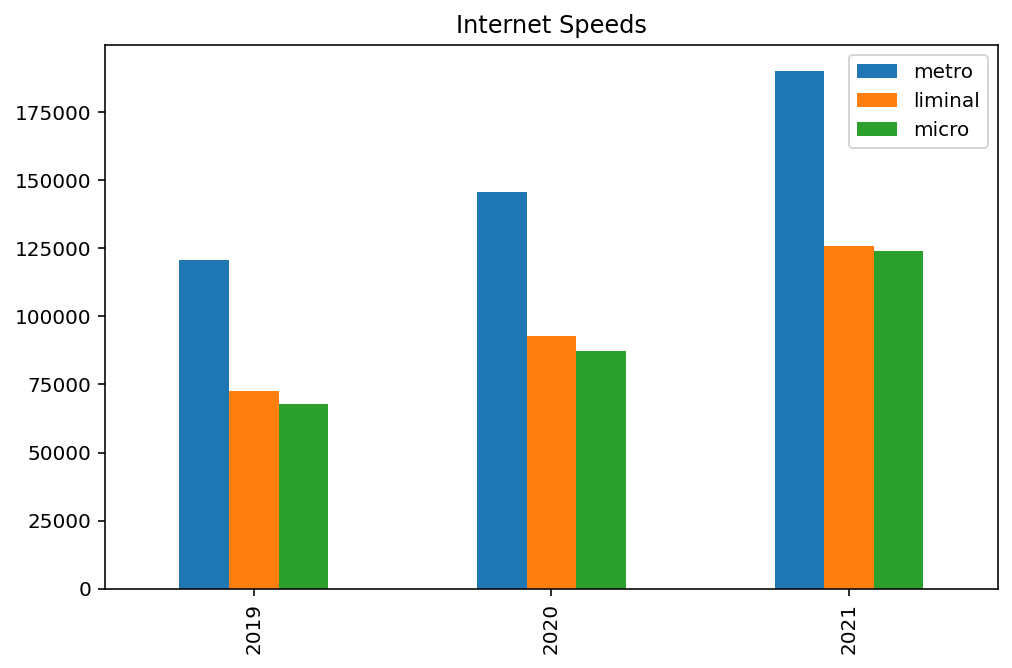

In [9]:
df = pd.DataFrame()
df.loc[2019, 'metro']   = df19[metro]['avg_d_kbps'].mean()
df.loc[2019, 'liminal'] = df19[liminal]['avg_d_kbps'].mean()
df.loc[2019, 'micro']   = df19[notLim]['avg_d_kbps'].mean()
df.loc[2020, 'metro']   = df20[metro]['avg_d_kbps'].mean()
df.loc[2020, 'liminal'] = df20[liminal]['avg_d_kbps'].mean()
df.loc[2020, 'micro']   = df20[notLim]['avg_d_kbps'].mean()
df.loc[2021, 'metro']   = df21[metro]['avg_d_kbps'].mean()
df.loc[2021, 'liminal'] = df21[liminal]['avg_d_kbps'].mean()
df.loc[2021, 'micro']   = df21[notLim]['avg_d_kbps'].mean()
df.plot(kind='bar', figsize=(8, 5))
plt.title("Internet Speeds");

In [10]:
len(dfwCbsas)

20

In [11]:
len(df19[liminal])

288